 # Practical Demonstration - Teacher Candidature Le Wagon.
- Candidate: Fernando Lagos Alvarado

# Machine Learning Workflow

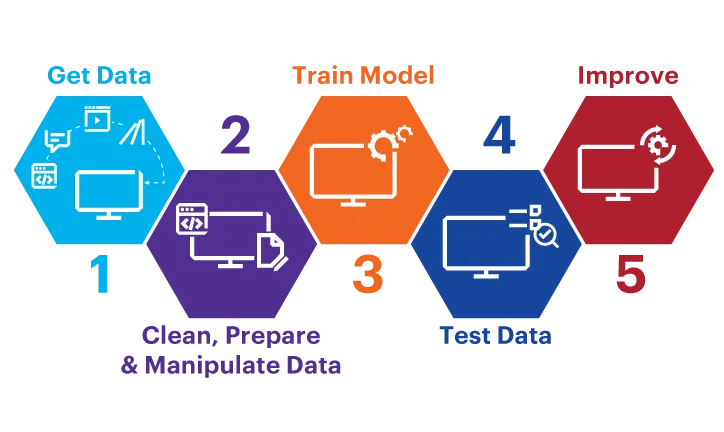

# Problem Definition. What would we be interested in predicting?

The idea of this Demo is to use a Machine Learning algorithm to predict malignant breast cancers from data in the following dataset.


# Dataset: Diagnostic Wisconsin Breast Cancer 

- Classification (Benign vs Malignant Cancer)
- It is integrated in the sklearn library. 
- UC Irvine Machine Learning Repositoy: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

The features are calculated from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe the characteristics of the cell nuclei present in the image.

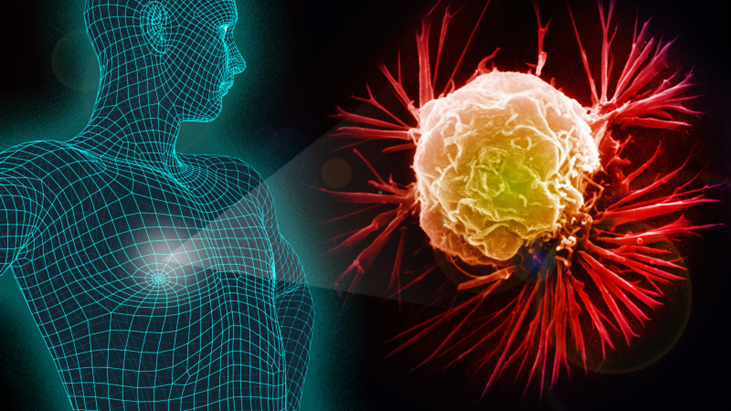

In [ ]:
# Import libraries:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix

## Load the dataset and convert it to DataFrame:

In [ ]:
cancer=load_breast_cancer()

df_cancer=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df_cancer['target']=cancer.target

In [ ]:
df_cancer['target'].unique() # target values to be predicted

NOTE: For this case, target 1 was defined as 'Benign cancer' and target 0 as 'Malignant cancer'.

# Preprocessing (Clean, Prepare & Manipulate Data)

## Exploratory Data Analysis (EDA):

In [ ]:
df_cancer.head()

In [ ]:
df_cancer.info()

## Defining the features and target:

In [ ]:
X = df_cancer.drop(columns=['target'])
y=df_cancer['target']

## Scaling the numerical features:

Recall that the numerical values of our variables or features were...

In [ ]:
df_cancer.head()

In [ ]:
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(X)

In [ ]:
X

## Split the dataset into "Training" and "Test":

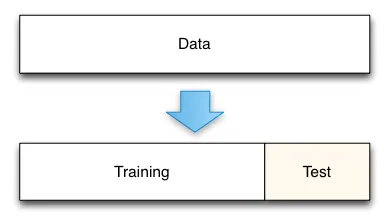

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.45, random_state=83)

# Train Model

## Selection of Machine Learning algorithm to be used:

### Logistic Regression will be used for this Demo.

Note: It is not the only algorithm that applies to this type of problem (Classification - Supervised Learning).

Other algorithms that would work for this task:
- Linear Discriminant Analysis
- Gaussian Naive Bayes
- etc.

Logistic Regression is used to predict the probability of a categorical dependent variable, suitable for binary classification problems (where the output variable can take two values, such as "yes" or "no", "1" or "0", "positive" or "negative").

## Training the model

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train);

## Obtaining model predictions on test data

In [ ]:
#Prediction with test data X_test
y_log_reg_test_data  = model.predict(X_test)

# Test Data

## Performance evaluation of the Machine Learning model:

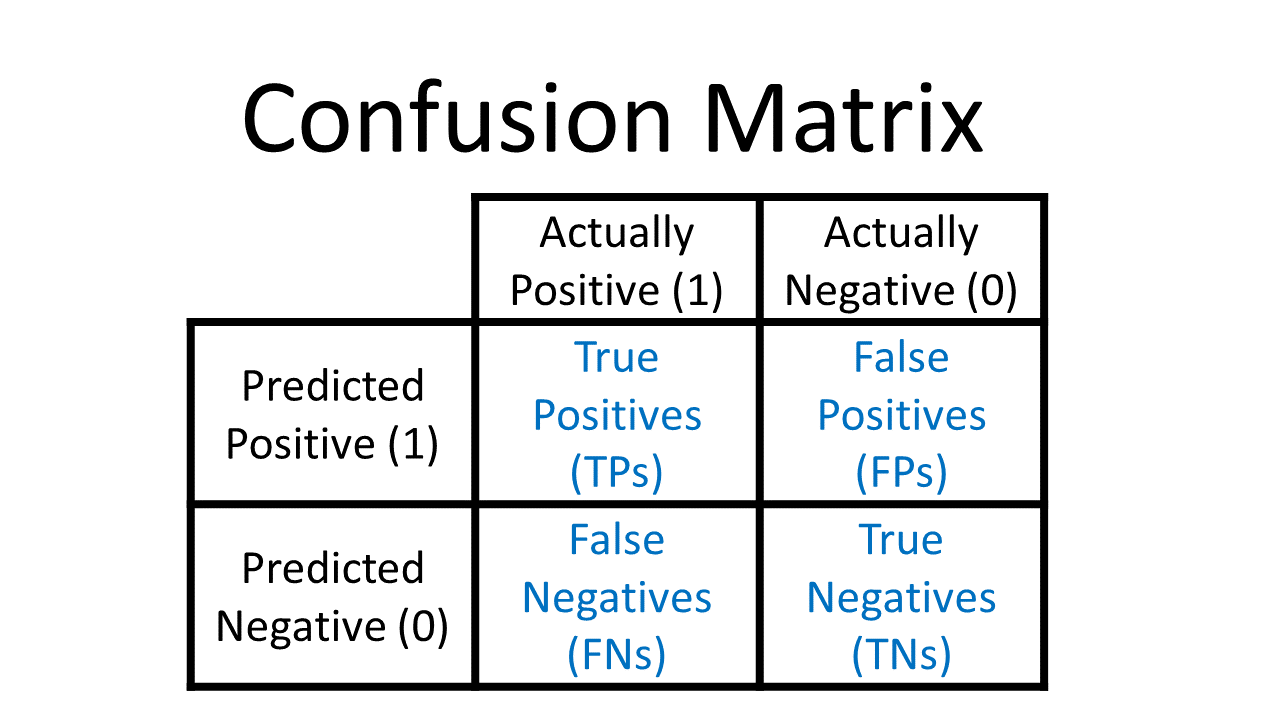

Remember! For this case:
- Target 1 (positive "+") was defined as 'Benign cancer'
- Target 0 (negative "-") as 'Malignant cancer'.

### How is the performance predicting on test data?

In [ ]:
plt.figure(figsize=(8, 6))
mat = confusion_matrix(y_test, y_log_reg_test_data)
sns.set_context('talk')  
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=load_breast_cancer().target_names, yticklabels=load_breast_cancer().target_names,
            annot_kws={"size": 15}) 

plt.xlabel('true label', fontsize=10)
plt.ylabel('predicted label (Logistic Regression)', fontsize=10)
plt.title('Confusion Matrix (y_train vs y_log_reg_test_data)', fontsize=12)


plt.tight_layout() 

In [ ]:
false_negatives = mat.T[1, 0]
print(f"False Negatives in test data (Predicted as Benign Cancer, but are Malignant Cancer): {false_negatives}")

According to the confusion matrix observed, related to the test data, 8 records of malignant cancer are identified that have been incorrectly categorized as benign. As with the model on the training data, this remains a concern, as these misdiagnoses could lead to affected patients not receiving treatment.

## So, what metric should be used for this problem?

- Considering the troubling problem that misdiagnoses could lead to affected patients not receiving treatment, false positives should be looked for.
- The perfect metric for this problem is SPECIFICITY!!!!

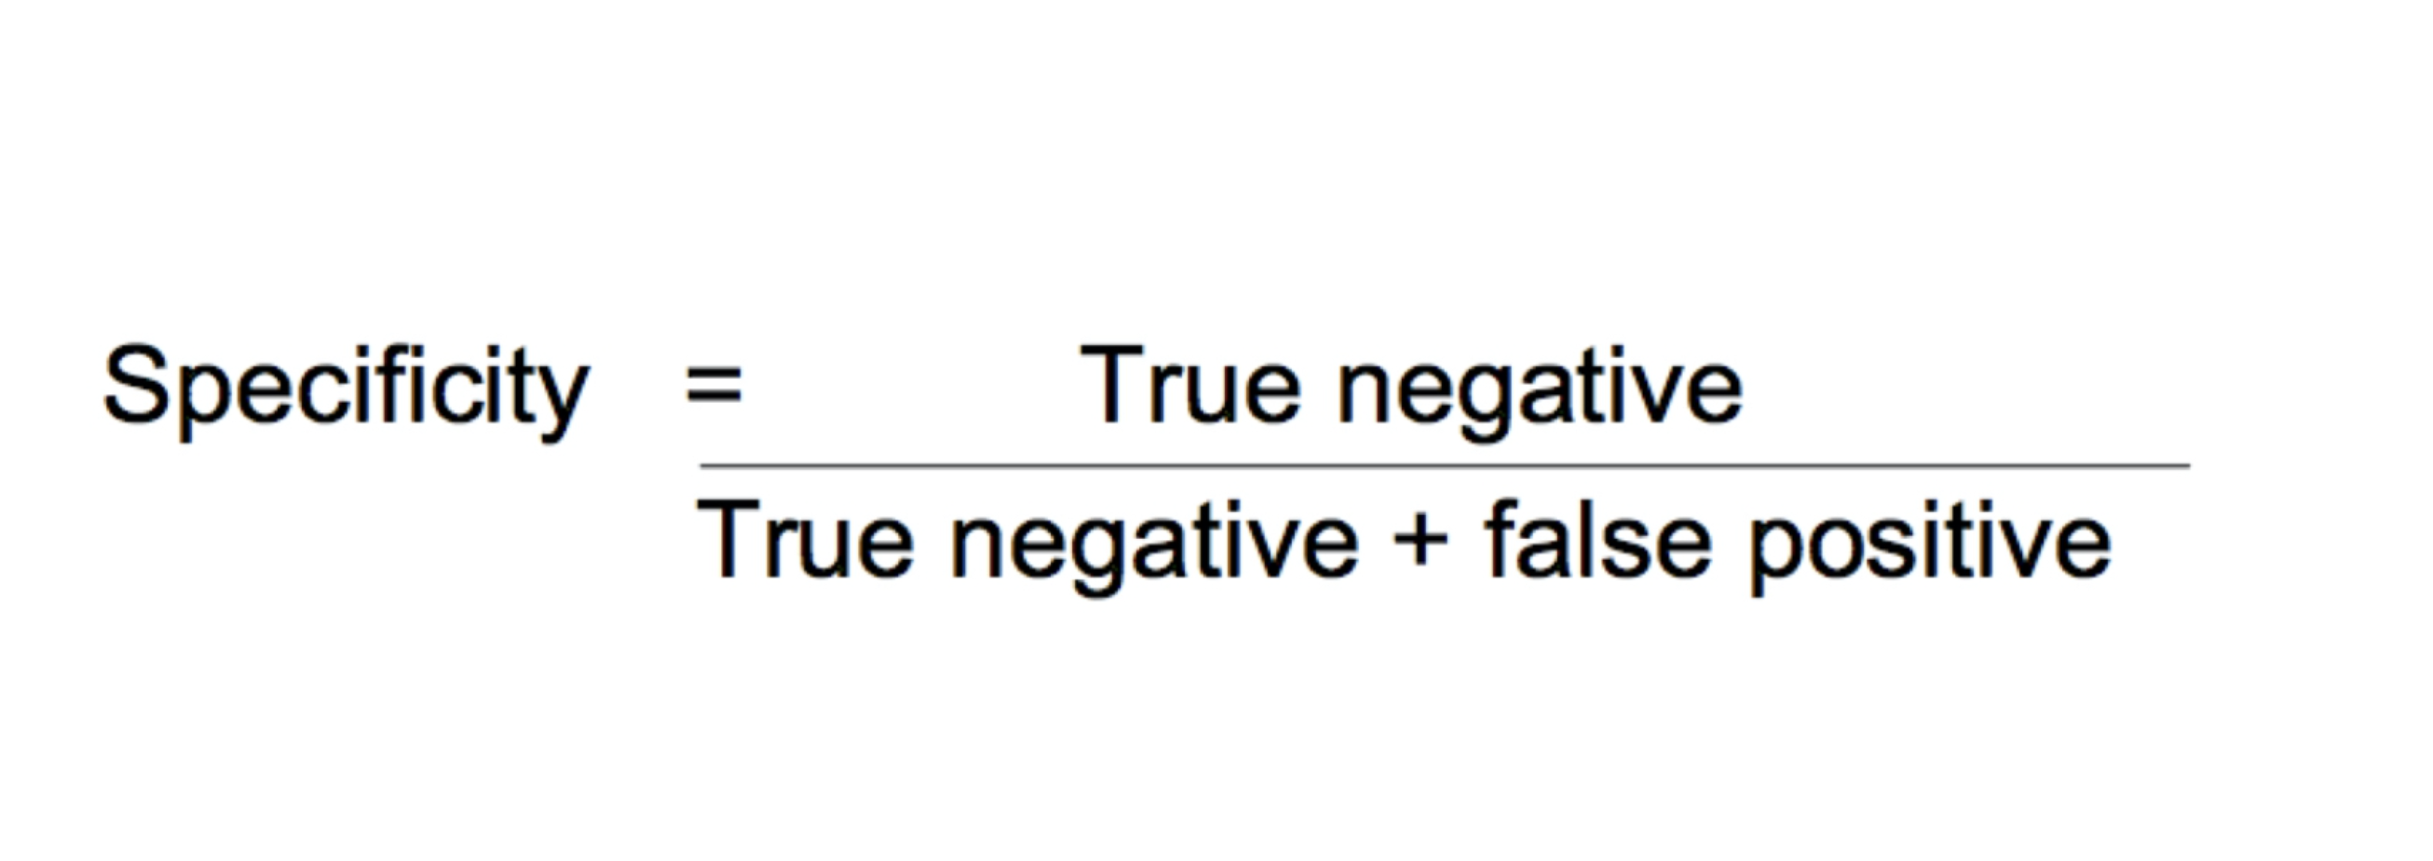

Specificity measures the proportion of true negatives (truly malignant cases) among all cases that were classified as benign by the model.

Remember! For this case, target 1 (+) was defined as 'Benign cancer' and target 0 (-) as 'Malignant cancer'.

In [ ]:
# Test set data:
y_real = y_test
y_pred = y_log_reg_test_data

In [ ]:
# Calculates the confusion matrix (training data)
confusion = confusion_matrix(y_real, y_pred)

# Extrae los valores de la matriz de confusión
tn, fp, fn, tp = confusion.ravel()

In [ ]:
def specificity_score(y_real, y_pred):
    # Calculate the confusion matrix:
    confusion = confusion_matrix(y_real, y_pred)
    # Extract the values of the confusion matrix
    tn, fp, fn, tp = confusion.ravel()
    # Calculate the specificity:
    specificity = tn / (tn + fp)

    return specificity

In [ ]:
print(f"The specificity of the breast cancer test data set is: {specificity_score(y_real,y_pred)}")

### Another way to analyze this problem is with the False Positive Rate (FPR):
- Measures the proportion of false positives among all true negative cases.

In [ ]:
def FPR(y_real, y_pred):
    # Calculate the confusion matrix:
    confusion = confusion_matrix(y_real, y_pred)
    # Extract the values of the confusion matrix
    tn, fp, fn, tp = confusion.ravel()
    # Calculate the specificity:
    specificity = fp / (tn + fp)

    return specificity

In [ ]:
print(f"The False Positive Rate (FPR) of the breast cancer test data set is: {FPR(y_real,y_pred)}")

# Conclusion:

- In this case, the idea was to identify cases of malignant cancer that could be misdiagnosed as benign.
Therefore, the aim was to minimize false positives, for which the specificity metric was used.

- The Machine Learning algorithm "Logistic Regression" was used, obtaining a specificity rate of 92.079% on the test data.

- The model correctly predicts 92.079% of malignant cancer cases as malignant. This is crucial in the medical context, as high specificity helps to ensure that malignant cancer cases are correctly identified, reducing the risk of missing a serious case.

- In the context of the breast cancer test data set means that 7.92% of all cases that were actually malignant (cancer) were incorrectly classified by the model as benign.

- An FPR of 7.92% is relatively low, indicating that the model has a good ability to correctly discriminate malignant cases, although there is some margin of error. However, in a medical setting, one ideally wants this rate to be as low as possible to minimize the risk of false diagnoses.

- The next step would be to test new ML algorithm models and optimize them for better results. 